In [11]:
import pandas as pd

df = pd.read_csv('monthly_dataset.csv')

df.head()

,Year,Month,Date,Population (million),Temperature (celsius),CPI,GDP (million bahts),Peak Load (MW),Generation (GWh),Consumption (GWh)
0,2002,Jan,2002-Jan,63.25,26.45,70.23,"480,343.33",14552.5,8261.93,7326.80
1,2002,Feb,2002-Feb,63.21,26.49,70.23,"480,343.33",15260.8,8187.95,7359.06
2,2002,Mar,2002-Mar,63.17,26.52,70.23,"480,343.33",16485.3,9687.11,8471.25
3,2002,Apr,2002-Apr,63.13,26.55,70.23,"470,404.67",16681.1,9378.36,8461.08
4,2002,May,2002-May,63.09,26.58,70.07,"470,404.67",16293.1,9654.67,8730.29


In [12]:
df = df.drop(['Year', 'Month', 'Date', 'Generation (GWh)', 'Consumption (GWh)'], axis=1)

df = df.sample(frac=1).reset_index(drop=True)

df.head()

,Population (million),Temperature (celsius),CPI,GDP (million bahts),Peak Load (MW)
0,63.62,26.95,85.03,"612,010.00",22044.90
1,66.11,27.54,97.72,"847,183.00",25312.30
2,64.82,26.78,96.47,"780,765.00",24251.18
3,66.16,26.56,101.18,"841,064.00",30135.30
4,66.08,27.52,97.72,"847,183.00",27242.00


In [16]:
X = df.drop('Peak Load (MW)', axis=1)
y = df['Peak Load (MW)']

X.shape, y.shape

((252, 4), (252,))

In [17]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Population (million)   252 non-null    float64
 1   Temperature (celsius)  252 non-null    float64
 2   CPI                    252 non-null    float64
 3   GDP (million bahts)    252 non-null    object 
dtypes: float64(3), object(1)
memory usage: 8.0+ KB


In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)

ValueError: could not convert string to float: '612,010.00'

In [5]:
train_len = 240

X_train = X[:train_len]
X_test = X[train_len:]

y_train = y[:train_len]
y_test = y[train_len:]

In [6]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((240, 3), (12, 3), (240,), (12,))

In [7]:
from tensorflow import keras

model = keras.Sequential()
model.add(keras.layers.Dense(6, activation='relu', input_shape=(3,)))
model.add(keras.layers.Dense(6, activation='relu'))
model.add(keras.layers.Dense(1))

model.compile(loss='mean_squared_error', optimizer='Adam')

history = model.fit(X_train, y_train, epochs=5000, batch_size=48, validation_split=0.2)

Epoch 1/5000
4/4 [==============================] - 1s 78ms/step - loss: 560193792.0000 - val_loss: 550003136.0000
Epoch 2/5000
4/4 [==============================] - 0s 14ms/step - loss: 560192320.0000 - val_loss: 550001728.0000
Epoch 3/5000
4/4 [==============================] - 0s 14ms/step - loss: 560190976.0000 - val_loss: 550000320.0000
Epoch 4/5000
4/4 [==============================] - 0s 13ms/step - loss: 560189504.0000 - val_loss: 549998912.0000
Epoch 5/5000
4/4 [==============================] - 0s 14ms/step - loss: 560188096.0000 - val_loss: 549997632.0000
Epoch 6/5000
4/4 [==============================] - 0s 12ms/step - loss: 560186688.0000 - val_loss: 549996480.0000
Epoch 7/5000
4/4 [==============================] - 0s 13ms/step - loss: 560185408.0000 - val_loss: 549995200.0000
Epoch 8/5000
4/4 [==============================] - 0s 13ms/step - loss: 560184128.0000 - val_loss: 549993920.0000
Epoch 9/5000
4/4 [==============================] - 0s 13ms/step - loss: 5601827

In [8]:
test_loss = model.evaluate(X_test, y_test)
print('Test loss:', test_loss)

1/1 [==============================] - 0s 94ms/step - loss: 1473032.3750
Test loss: 1473032.375


1/1 [==============================] - 0s 102ms/step


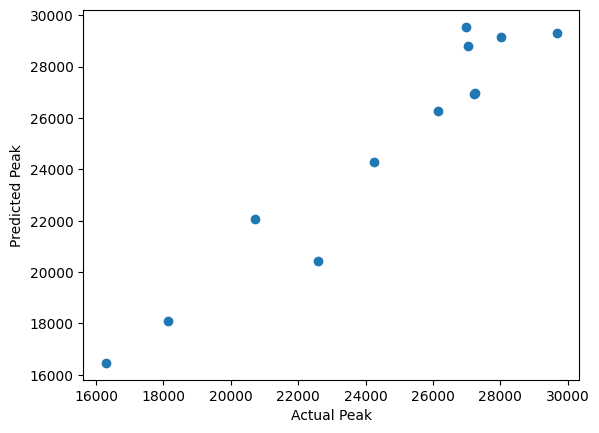

In [9]:
import matplotlib.pyplot as plt

y_pred = model.predict(X_test)
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Peak')
plt.ylabel('Predicted Peak')
plt.show()

In [10]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import numpy as np
import math

def mape(test, pred):
    test, pred = np.array(test), np.array(pred)
    mape = np.mean(np.abs((test - pred) / test))
    return mape

MSE  = mean_squared_error(y_test, y_pred)
RMSE = math.sqrt(MSE)
MAE  = mean_absolute_error(y_test, y_pred)
MAPE = mape(y_test, y_pred)

MSE, RMSE, MAE, MAPE

(1473032.300085279, 1213.6854205622142, 849.7665104166664, 0.2091196419369112)